In [1]:
import os
import numpy as np
import pickle
import glob
from matplotlib import  pyplot as plt

In [4]:
#paths = [r"M:\202404 Pleistocene Park\IR_mavic3\DJI_202404210937_006_Pleystocen-IR\img_data.pkl",
#         r"M:\202404 Pleistocene Park\IR_mavic3\DJI_202404211121_009_Pleystocen-IRb\img_data.pkl"] 

#data_dirs = [r"M:\202404 Pleistocene Park\IR_mavic3\\"]
data_dirs = [r"G:\! Data\IFA\! campaigns\202404 Pleistocene Park\IR_mavic3", 
             r"G:\! Data\IFA\! campaigns\292406 Mukhrino\IR processing"]

data = []

for data_dir in data_dirs:
    folders = glob.glob(data_dir + '/' + 'DJI*')
    for folder in folders:
        display(folder)
        path = folder + '/tiffs_thermal_parser, emis = 1.00/img_data.pkl'
        if not os.path.isfile (path):
            path = folder + '/img_data.pkl'
        if os.path.isfile (path):
            display(path)
            with open (path, 'rb') as f:
                cur_data = pickle.load (f) [0]
                cur_mean = cur_data.mean(axis=2)
                data.append(cur_mean)
            




# for i, path in enumerate(paths):
#    
    #data = np.concatenate((data, cur_data), axis=2)

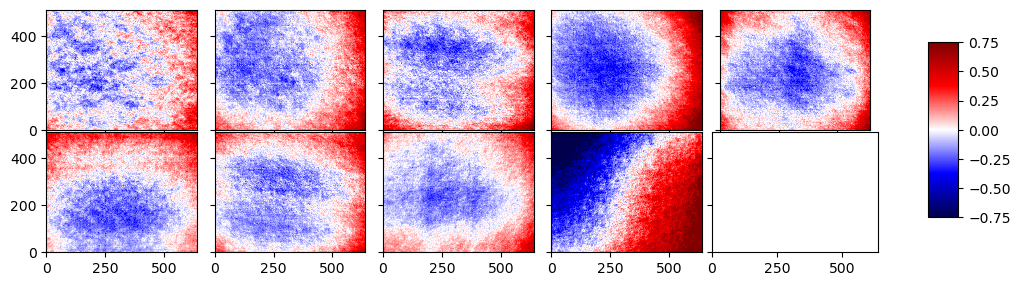

In [46]:
n = int (np.ceil(len(data)/2))

f, ax = plt.subplots (2,n, sharex=True, sharey=True, figsize=(n*2,2.5))
plt.subplots_adjust(left = 0.01, bottom = 0.01,top = 0.98, right = 0.85, hspace=0.01,wspace=0.01)
ax = ax.flatten()
    
for i, cur_data in enumerate (data):
    #plt.subplot(n,2,i+1)
    #display(cur_data.shape)
    plt.axes(ax[i])
    m = cur_data
    m = plt.pcolormesh (m - m.mean(), vmin=-0.75,vmax=0.75,cmap='seismic')
    plt.gca().set_aspect(1)
cbar_ax = f.add_axes([0.9, 0.15, 0.03, 0.7])
plt.colorbar(m, cax = cbar_ax)
    